# TUSHAR KUMAR
## Task - 1 (Prediction using Supervised ML)
## Data Science and Business Analytics 

In [1]:
#Importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data from the remote link
data = pd.read_csv("http://bit.ly/w-data")
print("Succesfully Data is imported")
data

Succesfully Data is imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Descriptive analysis

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Information about data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Identifying outliers, if any.

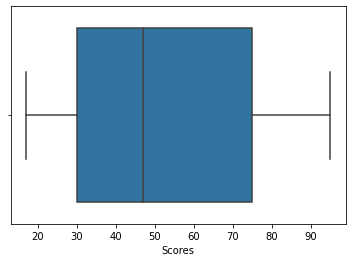

In [5]:
import seaborn as sns
sns.boxplot(x=data['Scores'])

## Visualizing the given data 

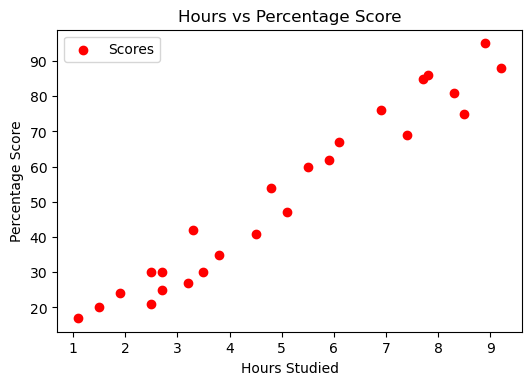

In [6]:
plt.figure(dpi=100)
plt.scatter(data.Hours, data.Scores, color='red', label='Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage Score')
plt.legend()
plt.show()

In [7]:
# Dividing data into attributes and labels
x=data.iloc[:, :-1].values
y=data.iloc[:, 1].values

## Training and Testing

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [9]:
# Training
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

print("Training complete.")

Training complete.


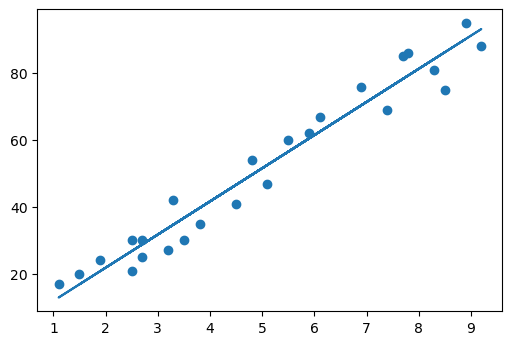

In [10]:
# Plotting the regression line
line = lr.coef_*x + lr.intercept_

# Plotting for the test data
plt.figure(dpi=100)
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [11]:
print(x_test) # Testing data in hours
y_pred = lr.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual and Predicted 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# Testing with our own data
hours = [[9.25]]
own_pred = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [14]:
#Evaluating the model using MSE
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [15]:
# Accuracry by R^2
lr.score(x_test, y_test)

0.9454906892105356